In this notebook, we perform the prediction of annual salaries of customers. We will continue this notebook from the exploration task performed in the earlier section.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
print(df.shape)

(12043, 23)


In [5]:
# checking null values
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

The columns with missing values are card_present_flag, bpay_biller_code, merchant_id, merchant_code, merchant_suburb, merchant_state and merchant_long_lat.

In [6]:
# checking the types of transactions where merchant_id is null 
df[df.merchant_id.isnull().values]['txn_description'].unique()

array(['PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK'], dtype=object)

In [7]:
# checking the types of transactions where merchant_id is not null 
df[df.merchant_id.notnull().values]['txn_description'].unique()

array(['POS', 'SALES-POS'], dtype=object)

Merchant_id is only missing for non-merchant involved transactions, such as Payment, inter bank, etc.

Columns related to merchants such as merchant_id, merchant_suburb, merchant_state, merchant_long_lat all have 4326 missing values, and they are missing only for non-merchant involved transactions. Also, card_present_flag has 4326 missing values. So, this column has also some type of relationship with the presence of merchants.

From the initial analysis, it can be considered that the bpay_biller_code and merchant_code, which have too many missing values, 11158 and 11160 respectively, are irrelevant and can be dropped or imputed in the next stage of our analysis process.

## Predictive Analytics

In [8]:
# Finding the annual salary for each customer
df[['customer_id','first_name','txn_description']]

,customer_id,first_name,txn_description
0,CUS-2487424745,Diana,POS
1,CUS-2487424745,Diana,SALES-POS
2,CUS-2142601169,Michael,POS
3,CUS-1614226872,Rhonda,SALES-POS
4,CUS-2487424745,Diana,SALES-POS
...,...,...,...
12038,CUS-55310383,Melissa,POS
12039,CUS-2688605418,Robert,SALES-POS
12040,CUS-2663907001,Craig,POS
12041,CUS-1388323263,Tyler,SALES-POS


In [9]:
# Extracting months from the date to find out the monthly salary for each customer
df['date'] = pd.to_datetime(df['date']) # converting timestamp column to datetime column to extract months
df['month'] = pd.DatetimeIndex(df['date']).month

In [10]:
df.month

0         8
1         8
2         8
3         8
4         8
         ..
12038    10
12039    10
12040    10
12041    10
12042    10
Name: month, Length: 12043, dtype: int64

In [11]:
# computing the total salary obtained for each customer in different months
df_type_salary = df[(df.txn_description == 'PAY/SALARY')]
df_type_salary[['customer_id','month','amount']].groupby(['customer_id','month']).sum()

amount
customer_id    month          
CUS-1005756958 8       3881.88
               9       3881.88
               10      4852.35
CUS-1117979751 8       7157.30
               9       7157.30
...                        ...
CUS-880898248  9       2867.96
               10      2867.96
CUS-883482547  8       7954.92
               9       7954.92
               10     11932.38

[296 rows x 1 columns]

It is seen that some customers are earning different salaries in different months and some are earning the same. So, we take an average of three months and consider that average as a monthly salary of customers.

In [12]:
# further grouping to get the average
df_salary = df_type_salary[['customer_id','month','amount']].groupby(['customer_id','month'], as_index=False).sum()
df_monthly_salary = df_salary[['customer_id','amount']].groupby('customer_id', as_index=False).mean()

In [13]:
df_monthly_salary

,customer_id,amount
0,CUS-1005756958,4205.370000
1,CUS-1117979751,8350.183333
2,CUS-1140341822,3833.020000
3,CUS-1147642491,7416.023333
4,CUS-1196156254,9108.703333
...,...,...
95,CUS-72755508,2901.280000
96,CUS-809013380,4493.970000
97,CUS-860700529,3617.240000
98,CUS-880898248,2867.960000


In [14]:
# creating annual salary column based on the monthly salary computed in a df_monthly_salary dataframe
mapper = dict(df_monthly_salary[['customer_id','amount']].values)
df['annual_salary'] = df['customer_id'].map(mapper) * 12

In [15]:
# viewing the yearly salary for all customer
df[['customer_id','annual_salary']].groupby(['customer_id','annual_salary']).count().reset_index() 

,customer_id,annual_salary
0,CUS-1005756958,50464.44
1,CUS-1117979751,100202.20
2,CUS-1140341822,45996.24
3,CUS-1147642491,88992.28
4,CUS-1196156254,109304.44
...,...,...
95,CUS-72755508,34815.36
96,CUS-809013380,53927.64
97,CUS-860700529,43406.88
98,CUS-880898248,34415.52


In [16]:
# checking the annual salary for one random customer in a dataframe and see if everything is correct 
df[df['customer_id'] == 'CUS-1005756958']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,annual_salary
163,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,0a1d930e-fed4-4d23-adee-6f46a9ac8bdb,NaN,Stephanie,...,QLD,2018-08-02T08:08:02.000+0000,6.48,498005fec6054a459538a3cb610526e2,Australia,CUS-1005756958,153.05 -27.42,debit,8,50464.44
272,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,9bd98735-8b39-4eb1-9226-4624430f74a1,NaN,Stephanie,...,QLD,2018-08-02T21:36:42.000+0000,39.95,7423c4b384ed465a94cad6feeeb5b0bd,Australia,CUS-1005756958,151.98 -27.59,debit,8,50464.44
315,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,392af96c-2a99-45eb-94e8-cddef88e1331,NaN,Stephanie,...,NSW,2018-08-03T08:27:40.000+0000,22.96,8daa0499269146708a05353c12574a69,Australia,CUS-1005756958,151.24 -33.89,debit,8,50464.44
320,authorized,0.0,NaN,ACC-2828321672,AUD,153.03 -27.51,POS,cd62798b-8895-4037-99f7-50c70d39abe0,NaN,Stephanie,...,QLD,2018-08-03T09:15:59.000+0000,9.11,7a0dfdefa53b4e13ab294840a514dda3,Australia,CUS-1005756958,153.09 -26.4,debit,8,50464.44
435,authorized,1.0,NaN,ACC-2828321672,AUD,153.03 -27.51,SALES-POS,9533e9e6-f9ea-49b8-b618-c11146028ba5,NaN,Stephanie,...,QLD,2018-08-03T21:51:32.000+0000,14.65,a92c12e2079f4bd1ac48dbad681395ce,Australia,CUS-1005756958,152.79 -27.61,debit,8,50464.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,posted,NaN,NaN,ACC-2828321672,AUD,153.03 -27.51,PAYMENT,NaN,NaN,Stephanie,...,NaN,2018-10-21T15:00:00.000+0000,156.00,2f8f9256249940c6977eb1ac8feb1ffa,Australia,CUS-1005756958,NaN,debit,10,50464.44
10951,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,NaN,2018-10-23T16:00:00.000+0000,970.47,e0caf4357a4e42e09fd7879463af07fa,Australia,CUS-1005756958,NaN,credit,10,50464.44
11142,posted,NaN,NaN,ACC-2828321672,AUD,153.03 -27.51,PHONE BANK,NaN,NaN,Stephanie,...,NaN,2018-10-25T04:00:00.000+0000,182.00,c6f9f40883324bb8a0e30eb7d1ccbbbe,Australia,CUS-1005756958,NaN,debit,10,50464.44
11650,posted,NaN,NaN,ACC-2828321672,AUD,153.03 -27.51,PAYMENT,NaN,NaN,Stephanie,...,NaN,2018-10-28T17:00:00.000+0000,128.00,1edb483f69d346bca90551ffd166ad61,Australia,CUS-1005756958,NaN,debit,10,50464.44


The yearly salary for this customer (CUS-1005756958) is 50464.44 which is correct, which can be seen above in the grouped dataframe. 

In [17]:
# computing the total spendings for each customer in different months
df_type_spendings = df[(df.txn_description == 'POS') | (df.txn_description == 'SALES-POS')]
df_type_spendings[['customer_id','month','amount']].groupby(['customer_id','month']).sum()

amount
customer_id    month         
CUS-1005756958 8      1643.52
               9       167.34
CUS-1117979751 8       614.00
               9      3046.31
               10      315.51
...                       ...
CUS-880898248  9       147.45
               10      434.59
CUS-883482547  8      1432.44
               9      1302.02
               10      971.73

[285 rows x 1 columns]

In [18]:
# since customers have different spendings on different months, so we average the spendings of three months to get the monthly spendings
df_spendings = df_type_spendings[['customer_id','month','amount']].groupby(['customer_id','month'], as_index=False).sum()
# further grouping to get the average monthly spendings
df_monthly_spendings = df_spendings[['customer_id','amount']].groupby('customer_id', as_index=False).mean()
df_monthly_spendings

,customer_id,amount
0,CUS-1005756958,905.430000
1,CUS-1117979751,1325.273333
2,CUS-1140341822,1463.180000
3,CUS-1147642491,1295.250000
4,CUS-1196156254,1646.870000
...,...,...
95,CUS-72755508,518.176667
96,CUS-809013380,800.726667
97,CUS-860700529,1994.386667
98,CUS-880898248,539.523333


In [19]:
# creating annual spendings column based on the monthly spendings computed in df_monthly_spendings dataframe
mapper2 = dict(df_monthly_spendings[['customer_id','amount']].values)
df['annual_spendings'] = df['customer_id'].map(mapper2) * 12

In [20]:
# viewing the annual spendings for all customers
df[['customer_id','annual_spendings']].groupby(['customer_id','annual_spendings']).count().reset_index() 

,customer_id,annual_spendings
0,CUS-1005756958,10865.16
1,CUS-1117979751,15903.28
2,CUS-1140341822,17558.16
3,CUS-1147642491,15543.00
4,CUS-1196156254,19762.44
...,...,...
95,CUS-72755508,6218.12
96,CUS-809013380,9608.72
97,CUS-860700529,23932.64
98,CUS-880898248,6474.28


In [21]:
# checking if there are customers whose annual expenses are bigger than the annual income
df[df['annual_salary'] < df['annual_spendings']]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,annual_salary,annual_spendings


In [22]:
# creating a list containing customer-related columns which have the same values for a particular customer
customer_related_columns =['account','long_lat','first_name', 'gender', 'age', 'country', 'customer_id','annual_spendings', 'annual_salary']

In [23]:
# checking if the column values are the same in each row for a customer
df[customer_related_columns][df['customer_id'] == 'CUS-1005756958']

,account,long_lat,first_name,gender,age,country,customer_id,annual_spendings,annual_salary
163,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
272,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
315,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
320,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
435,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
...,...,...,...,...,...,...,...,...,...
10713,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
10951,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
11142,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44
11650,ACC-2828321672,153.03 -27.51,Stephanie,F,53,Australia,CUS-1005756958,10865.16,50464.44


In [24]:
# creating a dataframe containing records for each customer from customer attributes
df_customer = df[customer_related_columns].groupby(customer_related_columns).count().reset_index()

In [25]:
df_customer

,account,long_lat,first_name,gender,age,country,customer_id,annual_spendings,annual_salary
0,ACC-1037050564,153.10 -27.66,Rhonda,F,40,Australia,CUS-1614226872,27381.08,46388.68
1,ACC-1056639002,145.03 -37.91,Michael,M,22,Australia,CUS-3462882033,7902.12,76680.24
2,ACC-1199531521,116.02 -31.87,Billy,M,52,Australia,CUS-134833760,6738.84,106001.84
3,ACC-1217063613,147.61 -37.82,Kimberly,F,27,Australia,CUS-1739931018,1874.88,58363.44
4,ACC-1222300524,151.23 -33.94,Michael,M,38,Australia,CUS-2142601169,38743.04,52110.76
...,...,...,...,...,...,...,...,...,...
95,ACC-854938045,147.63 -22.84,James,M,28,Australia,CUS-4023861240,23451.16,71083.04
96,ACC-90814749,151.68 -32.98,Christopher,M,35,Australia,CUS-1896554896,13271.12,55408.08
97,ACC-958000567,130.90 -12.37,Sandra,F,34,Australia,CUS-4142663097,28771.92,98493.08
98,ACC-964839203,146.92 -36.07,Michael,M,21,Australia,CUS-2059096722,7735.44,81130.40


In our analysis, we take the customer location to get their suburb and state details as we believe that the type of suburb might also be linked with the income of customers as there are suburbs where rich people live. So, first, we split the long_lat column into separate longitude and latitude column and combine them together with a comma in between them with latitude coming in front of longitude to make it suitable for reverse geocoding.

In [26]:
# splitting the columns into two columns
df_customer[['Cust_long','Cust_lat']] = df_customer.long_lat.str.split(expand = True)
df_customer

,account,long_lat,first_name,gender,age,country,customer_id,annual_spendings,annual_salary,Cust_long,Cust_lat
0,ACC-1037050564,153.10 -27.66,Rhonda,F,40,Australia,CUS-1614226872,27381.08,46388.68,153.10,-27.66
1,ACC-1056639002,145.03 -37.91,Michael,M,22,Australia,CUS-3462882033,7902.12,76680.24,145.03,-37.91
2,ACC-1199531521,116.02 -31.87,Billy,M,52,Australia,CUS-134833760,6738.84,106001.84,116.02,-31.87
3,ACC-1217063613,147.61 -37.82,Kimberly,F,27,Australia,CUS-1739931018,1874.88,58363.44,147.61,-37.82
4,ACC-1222300524,151.23 -33.94,Michael,M,38,Australia,CUS-2142601169,38743.04,52110.76,151.23,-33.94
...,...,...,...,...,...,...,...,...,...,...,...
95,ACC-854938045,147.63 -22.84,James,M,28,Australia,CUS-4023861240,23451.16,71083.04,147.63,-22.84
96,ACC-90814749,151.68 -32.98,Christopher,M,35,Australia,CUS-1896554896,13271.12,55408.08,151.68,-32.98
97,ACC-958000567,130.90 -12.37,Sandra,F,34,Australia,CUS-4142663097,28771.92,98493.08,130.90,-12.37
98,ACC-964839203,146.92 -36.07,Michael,M,21,Australia,CUS-2059096722,7735.44,81130.40,146.92,-36.07


In [27]:
df_customer['lat_long'] = df_customer['Cust_lat'].map(str) + ',' + df_customer['Cust_long'].map(str)
df_customer['lat_long'].unique()

array(['-27.66,153.10', '-37.91,145.03', '-31.87,116.02', '-37.82,147.61',
       '-33.94,151.23', '-33.78,150.90', '-37.73,144.79', '-37.70,145.13',
       '-33.91,151.09', '-37.84,145.17', '-33.93,151.08', '-34.84,138.69',
       '-33.77,150.92', '-37.84,145.16', '-12.45,130.84', '-31.90,115.83',
       '-27.48,153.09', '-27.95,153.41', '-33.87,151.22', '-37.93,145.01',
       '-37.81,144.89', '-34.86,138.67', '-34.01,150.82', '-37.95,145.06',
       '-33.79,150.68', '-32.00,116.06', '-37.66,143.88', '-27.61,153.05',
       '-31.90,115.78', '-28.80,114.62', '-35.25,149.03', '-37.90,144.99',
       '-37.88,145.03', '-34.93,138.63', '-31.88,116.00', '-36.04,146.94',
       '-37.58,144.71', '-37.84,144.96', '-32.07,115.98', '-37.91,144.66',
       '-33.85,151.27', '-35.27,138.56', '-34.89,138.61', '-30.75,121.48',
       '-34.96,138.58', '-38.03,145.35', '-23.52,148.16', '-27.49,152.99',
       '-37.69,144.96', '-33.99,151.11', '-37.76,144.95', '-27.51,153.03',
       '-27.93,153.32', '

Here, we discovered that there are invalid location coordinates of latitude -573.00 and longitude 255.00 as the valid range for latitude is -90 to 90 and for longitude is -180 to 180. For a moment, we replace this location with the previous record location coordinates and later we will replace this with the most occurring location.

In [28]:
df_customer[df_customer['lat_long'] == '-573.00,255.00']

,account,long_lat,first_name,gender,age,country,customer_id,annual_spendings,annual_salary,Cust_long,Cust_lat,lat_long
54,ACC-2901672282,255.00 -573.00,Daniel,M,22,Australia,CUS-1617121891,23749.44,93205.56,255.00,-573.00,"-573.00,255.00"


We take note of this customer's id, CUS-161712891, and index number (54) which we will use to replace with the most occurring value later. 

In [29]:
# replacing the invalid value with the previous customer's location coordinates
df_customer['lat_long'] = df_customer['lat_long'].str.replace('-573.00,255.00','-34.37,150.90')

<ipython-input-29-d2a316ec2a10>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_customer['lat_long'] = df_customer['lat_long'].str.replace('-573.00,255.00','-34.37,150.90')


In [30]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [31]:
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [32]:
df_customer['address'] = df_customer['lat_long'].apply(rgeocode)

In [33]:
# creating two columns containing customer suburb and state
# here the suburb/ town/ village column is created using multiple if conditions
df_customer['customer_suburb/town/village'] = df_customer['address'].map(lambda x: x.raw['address'].get('suburb') \
                                  if 'suburb' in x.raw['address'] else (x.raw['address'].get('town') \
                                  if 'town' in x.raw['address'] else (x.raw['address'].get('village') \
                                  if 'village' in x.raw['address'] else x.raw['address'].get('city'))))
df_customer['customer_state/territory'] = df_customer['address'].map(lambda x: x.raw['address'].get('state') \
                                                           if 'state' in x.raw['address'] else x.raw['address'].get('territory'))

In [34]:
# checking if any null values present in the customer dataframe
df_customer[df_customer.isna().any(axis=1)]

,account,long_lat,first_name,gender,age,country,customer_id,annual_spendings,annual_salary,Cust_long,Cust_lat,lat_long,address,customer_suburb/town/village,customer_state/territory


In [35]:
len(df_customer['customer_suburb/town/village'].unique())

97

For a total of 100 customers, we have 97 unique values for the suburb/ town/ village. Due to this, this attribute will not be helpful in determining the annual salary. Thus, we can drop this column from our prediction analysis as including this column will create unnecessary overheads.

In [36]:
# replacing the previously imputed customer location with the mode of the customer state
mode_value = df_customer.mode()['customer_state/territory'][0]
df_customer.at[54,'customer_state/territory'] = mode_value

In [37]:
# removing irrelevant and redundant columns in the first round of column removal
# in this round, we remove account and customer_id as these are unique to every customer so we do not get any information 
# to predict annual income. Similarly, first_name is also removed for the same purpose. Other attributes we removed include
# some unnecessary location attributes as we only keep state information only from the location
irrelevant = ['long_lat', 'country', 'address', 'Cust_long', 'Cust_lat', 'lat_long', 'customer_suburb/town/village',\
              'first_name', 'account', 'customer_id']
df_customer.drop(irrelevant, axis=1, inplace =True)

In [38]:
df_customer

,gender,age,annual_spendings,annual_salary,customer_state/territory
0,F,40,27381.08,46388.68,Queensland
1,M,22,7902.12,76680.24,Victoria
2,M,52,6738.84,106001.84,Western Australia
3,F,27,1874.88,58363.44,Victoria
4,M,38,38743.04,52110.76,New South Wales
...,...,...,...,...,...
95,M,28,23451.16,71083.04,Queensland
96,M,35,13271.12,55408.08,New South Wales
97,F,34,28771.92,98493.08,Northern Territory
98,M,21,7735.44,81130.40,New South Wales


### One hot encoding

Before determining correlation, we encode categorical attributes using one-hot encoding

In [39]:
df_customer_onehot = pd.get_dummies(df_customer)
df_customer_onehot.head(10)

,age,annual_spendings,annual_salary,gender_F,gender_M,customer_state/territory_Australian Capital Territory,customer_state/territory_New South Wales,customer_state/territory_Northern Territory,customer_state/territory_Queensland,customer_state/territory_South Australia,customer_state/territory_Tasmania,customer_state/territory_Victoria,customer_state/territory_Western Australia
0,40,27381.08,46388.68,1,0,0,0,0,1,0,0,0,0
1,22,7902.12,76680.24,0,1,0,0,0,0,0,0,1,0
2,52,6738.84,106001.84,0,1,0,0,0,0,0,0,0,1
3,27,1874.88,58363.44,1,0,0,0,0,0,0,0,1,0
4,38,38743.04,52110.76,0,1,0,1,0,0,0,0,0,0
5,42,10591.04,40357.92,0,1,0,1,0,0,0,0,0,0
6,44,8507.48,69296.16,0,1,0,0,0,0,0,0,1,0
7,33,14559.36,65244.24,0,1,0,0,0,0,0,0,1,0
8,46,10164.48,59290.80,1,0,0,1,0,0,0,0,0,0
9,39,11362.24,85991.92,0,1,0,0,0,0,0,0,1,0


### Correlation

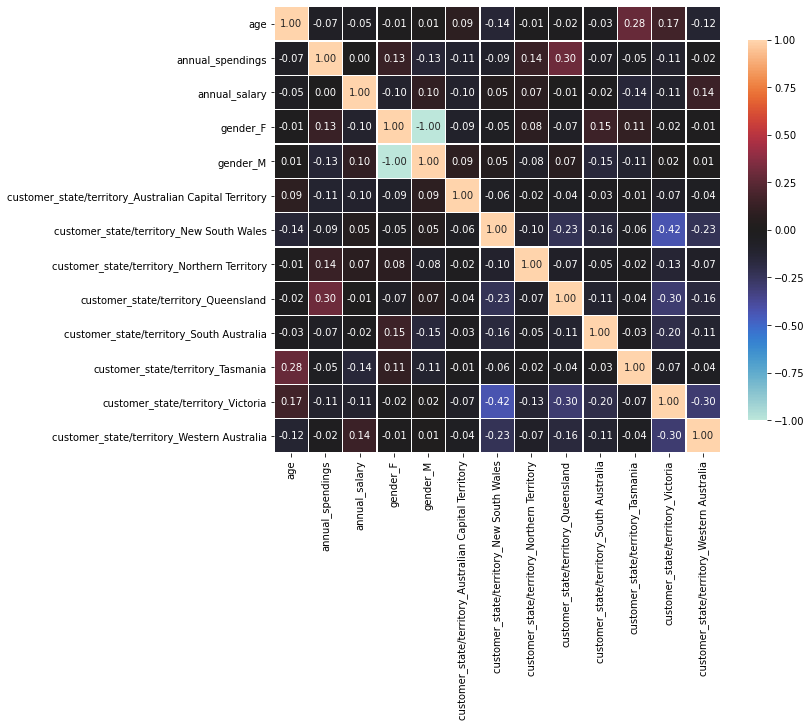

In [40]:
# plotting correlation statistics using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
correlations = df_customer_onehot.corr(method ='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',\
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

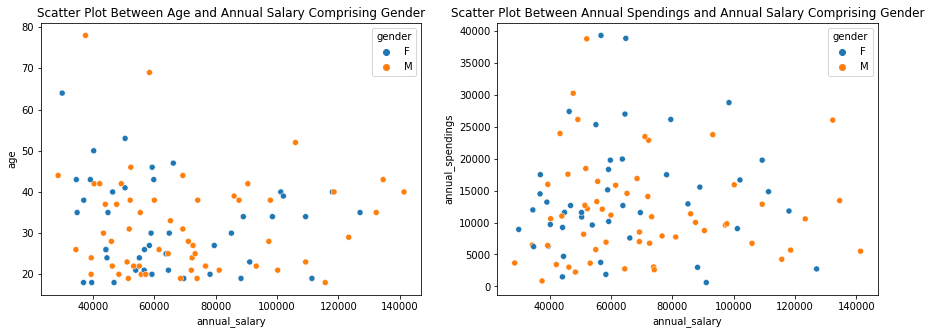

In [41]:
# scatter plots between two numerical predictor attributes
fig, ax = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(15,5))
g1 = sns.scatterplot(data=df_customer, x='annual_salary', y='age', hue='gender', ax=ax[0])
g1.set_title('Scatter Plot Between Age and Annual Salary Comprising Gender', y=1, fontsize=12)
g2 = sns.scatterplot(data=df_customer, x='annual_salary', y='annual_spendings', hue='gender', ax=ax[1])
g2.set_title('Scatter Plot Between Annual Spendings and Annual Salary Comprising Gender', y=1, fontsize=12)
plt.show()

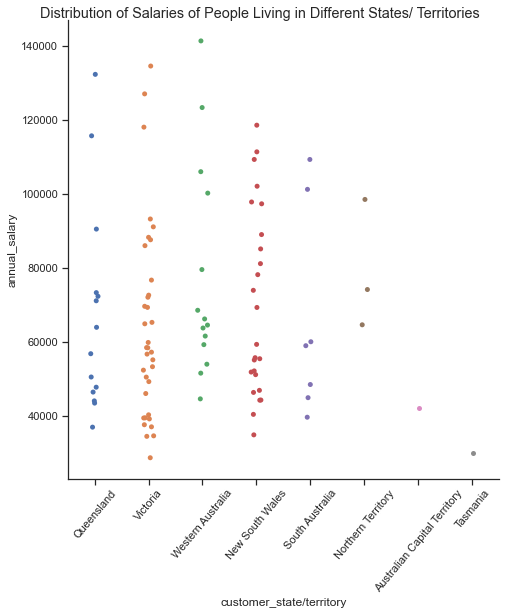

In [42]:
sns.set_theme(style="ticks")
g = sns.catplot(x='customer_state/territory', y='annual_salary', data=df_customer, height=7)
g.set_xticklabels(rotation=50)
g.fig.suptitle('Distribution of Salaries of People Living in Different States/ Territories', y=1)
plt.show()

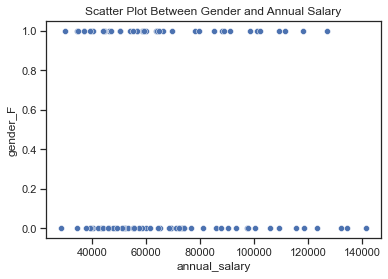

In [43]:
g3 = sns.scatterplot(data=df_customer_onehot, x='annual_salary', y='gender_F')
g3.set_title('Scatter Plot Between Gender and Annual Salary', y=1, fontsize=12)
plt.show()

**Takeaway from Correlation Statistics and Scatter Plots:**

From the correlation statistics, we can see that there is no strong correlation between annual spendings and other attributes. The calculated column (annual spending) has zero correlation with the annual salary.
Regarding the scatter plot between age and annual salary, it is seen that people whose age is less than 50 had higher salaries. Similarly, the plot between annual spendings and annual salary offers no meaningful information. From the distribution of salaries of people living in different states, it is seen that Victoria has most of its people in the salary range of 40000 to 95000. There is one person from Western Australia who earns the most among all people present in this dataset. Due to a limited number of data points, no other meaningful information can be extracted. The scatter plot between age and gender visualises that if a person is male, there is a high chance that the person's annual income might fall between the 40000 and 75000 range. 

### Linear Regression:

Before building a linear regression model, we apply some preprocessing steps to standardise the data and split the dataset into testing and training dataset.

In [44]:
# we will not include annual spendings as a predictor since it has zero correlation with the annual salary
target = 'annual_salary'
se_onehot_target = df_customer_onehot[target]
df_onehot_features = df_customer_onehot.drop([target,'annual_spendings'], axis=1)

In [45]:
df_onehot_features

,age,gender_F,gender_M,customer_state/territory_Australian Capital Territory,customer_state/territory_New South Wales,customer_state/territory_Northern Territory,customer_state/territory_Queensland,customer_state/territory_South Australia,customer_state/territory_Tasmania,customer_state/territory_Victoria,customer_state/territory_Western Australia
0,40,1,0,0,0,0,1,0,0,0,0
1,22,0,1,0,0,0,0,0,0,1,0
2,52,0,1,0,0,0,0,0,0,0,1
3,27,1,0,0,0,0,0,0,0,1,0
4,38,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,28,0,1,0,0,0,1,0,0,0,0
96,35,0,1,0,1,0,0,0,0,0,0
97,34,1,0,0,0,1,0,0,0,0,0
98,21,0,1,0,1,0,0,0,0,0,0


In [46]:
# scaling the data
from sklearn.preprocessing import StandardScaler
np_feature_scaled = StandardScaler().fit_transform(df_onehot_features) 

Since the dataset we have is small (100 rows), we will use leave one out cross validation to measure the performance of the prediction model.

In [47]:
# using linear regression model for prediction along with using leave one out cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
y_true, y_pred = list(), list()
for train_index, test_index in loo.split(np_feature_scaled):
    X_train, X_test = np_feature_scaled[train_index], np_feature_scaled[test_index]
    y_train, y_test = se_onehot_target[train_index], se_onehot_target[test_index]
    # fitting the model
    linear_regressor = LinearRegression()  
    linear_regressor.fit(X_train, y_train)  
    pred = linear_regressor.predict(X_test)
    # storing the true and predicted value for an index
    y_true.append(y_test)
    y_pred.append(pred)

In [48]:
# measuring the performance of our linear regression model
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', round(mean_absolute_error(y_true, y_pred),3)) 

Mean Absolute Error: 2.8330130735482896e+17


In [49]:
print('The range of annual salary is from %f to %f ' %(df_customer['annual_salary'].min(),df_customer['annual_salary'].max()))

The range of annual salary is from 28623.840000 to 141375.680000 


The forecasted average error is astronomical compared to the range of the values in the actual annual salary. Hence, the result is abysmal.

**Removal of States and Gender**

In [50]:
# removing gender and states and keeping age as the predictor attribute
df_customer2 = df_customer[['age','annual_salary']]
df_customer2

,age,annual_salary
0,40,46388.68
1,22,76680.24
2,52,106001.84
3,27,58363.44
4,38,52110.76
...,...,...
95,28,71083.04
96,35,55408.08
97,34,98493.08
98,21,81130.40


In [51]:
# separating target and predictors
se_target2 = df_customer2[target]
# converting the dataframe to numpy array to make it suitable for leave one out cross validation
np_features2 = df_customer2.drop(target, axis=1).to_numpy()

In [52]:
loo = LeaveOneOut()
y_true, y_pred = list(), list()
for train_index, test_index in loo.split(np_features2):
    X_train, X_test = np_features2[train_index], np_features2[test_index]
    y_train, y_test = se_target2[train_index], se_target2[test_index]
    # fitting the model
    linear_regressor = LinearRegression()  
    linear_regressor.fit(X_train, y_train)  
    pred = linear_regressor.predict(X_test)
    # storing the true and predicted value for an index
    y_true.append(y_test)
    y_pred.append(pred)
# calculate performance    
print('Mean Absolute Error:', round(mean_absolute_error(y_true, y_pred),3))

Mean Absolute Error: 21727.218


**Accuracy of the model and prediction on unseen data:**

The model we produced is not accurate at all, and this model in no way should be used to predict the annual salary of unseen customers by ANZ. One of the reasons why this model failed terribly is the scarcity in the number of data points. We only have 100 records to start with the prediction. These 100 records do not generalise the whole population. Our model is a good example of the Garbage In Garbage Out phrase. If we do not pass a representative sample to the model then the model will always generate erroneous results.

### Decision-Tree Based Models:

We will look after three different types of decision trees.

**1. Plain Decision Tree**

In [53]:
# we use the one-hot encoded features to predict annual salary using decision tree as decision tree implemented on sklearn
# cannot use categorical variables out of the box
np_tree_features = df_onehot_features
se_tree_target = se_onehot_target

In [54]:
# splitting the dataset to obtain the validation dataset
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(np_tree_features, se_tree_target, test_size=0.3, random_state=2021)

In [55]:
# finding the important features and creating new training and validation set containing only important features
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(random_state=2021)  
sel = SelectFromModel(estimator=decision_regressor)
X_train_new = sel.fit_transform(X_train, y_train) # new training set with important features
mask = sel.get_support()
X_valid_new = X_valid.loc[:, mask] # using only the relevant feature from the test dataset

We will further expand the prediction by building an optimised model using the best hyperparameters from a list of hyperparameters using grid search. For complexity sake, we will only use some hyperparameters we deemed important with a specific range of values.

**Optimised Model:**

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# creating 10 folds for cross validation
cv_decision = KFold(n_splits=10, shuffle=True, random_state=2021)
# specifying the parameters to fine-tune
params_decision= {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'], 'max_depth':[50,100,150,200],\
                  'splitter':['best', 'random'], 'min_samples_split':[2,5,15,20]\
         , 'max_features':[None, 'sqrt', 'log2']}

gs_decision = GridSearchCV(estimator=DecisionTreeRegressor(random_state=2021), 
                      param_grid=params_decision, 
                      cv=cv_decision,
                      verbose=1,  
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1,
                      return_train_score=True)

In [57]:
# fitting the training data
gs_decision.fit(X_train_new, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=2021), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': [50, 100, 150, 200],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 15, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# getting the best parameters
gs_decision.best_params_

{'criterion': 'mae',
 'max_depth': 50,
 'max_features': None,
 'min_samples_split': 2,
 'splitter': 'random'}

In [59]:
# getting the best score from the hyperparameters
gs_decision.best_score_

-19998.57085714286

We can ignore the negative sign present in this score. The scoring used in grid search cv (neg_mean_absolute_error) maximises negative values to find the minimum mean absolute error. The negative mean absolute error of -19998.57085714286 can be considered as a mean absolute error of 19998.57085714286.

**Building Optimised Model for Prediction**

In [60]:
decision_clf = DecisionTreeRegressor(criterion='mae', max_depth=50, max_features=None,\
                                     min_samples_split=2, splitter='random', random_state=2021)
decision_clf.fit(X_train_new, y_train)
y_pred = decision_clf.predict(X_valid_new)
print('Mean Absolute Error:', round(mean_absolute_error(y_valid, y_pred),3))

Mean Absolute Error: 22983.79


**2. Random Forest**

In [61]:
# finding the important features and creating new training and validation set containing only important features
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(random_state=2021)  
sel = SelectFromModel(estimator=random_regressor)
X_train_new = sel.fit_transform(X_train, y_train) # new training set with important features
mask = sel.get_support()
X_valid_new = X_valid.loc[:, mask] # using only the relevant feature from the test dataset

In [62]:
cv_random = KFold(n_splits=10, shuffle=True, random_state=2021)
# specifying the parameters to fine-tune
params_random= {'criterion':['mse', 'mae'], 'max_depth':[50,100,150,200], 'n_estimators':[10, 50, 100, 200],\
                   'min_samples_split':[2,5,15,20], 'max_features':[None, 'sqrt', 'log2']}

gs_random = GridSearchCV(estimator=RandomForestRegressor(random_state=2021), 
                      param_grid=params_random, 
                      cv=cv_random,
                      verbose=1,  
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1,
                      return_train_score=True)

In [63]:
# fitting the training data
gs_random.fit(X_train_new, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=RandomForestRegressor(random_state=2021), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [50, 100, 150, 200],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 15, 20],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# getting the best parameters
print(gs_random.best_params_)
print()
# getting the best score from the hyperparameters
print(gs_random.best_score_)

{'criterion': 'mse', 'max_depth': 50, 'max_features': None, 'min_samples_split': 20, 'n_estimators': 10}

-20018.62652730036


**Model Building**

In [65]:
random_clf = RandomForestRegressor(criterion='mse', max_depth=50, max_features=None,\
                                     min_samples_split=20, n_estimators=10, random_state=2021)
random_clf.fit(X_train_new, y_train)
y_pred = random_clf.predict(X_valid_new)
print('Mean Absolute Error:', round(mean_absolute_error(y_valid, y_pred),3))

Mean Absolute Error: 20968.701


**3. Gradient Boosting**

In [66]:
# finding the important features and creating new training and validation set containing only important features
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=2021)  
sel = SelectFromModel(estimator=gb_regressor)
X_train_new = sel.fit_transform(X_train, y_train) # new training set with important features
mask = sel.get_support()
X_valid_new = X_valid.loc[:, mask] # using only the relevant feature from the test dataset

In [67]:
cv_gb = KFold(n_splits=10, shuffle=True, random_state=2021)
# specifying the parameters to fine-tune
params_gb= {'criterion':['friedman_mse','mse', 'mae'], 'max_depth':[50,100,150,200], 'n_estimators':[10, 50, 100, 200],\
                   'min_samples_split':[2,5,15,20], 'max_features':[None, 'sqrt', 'log2'],\
           'learning_rate':[0.1,0.01,0.001]}

gs_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=2021), 
                      param_grid=params_gb, 
                      cv=cv_gb,
                      verbose=1,  
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1,
                      return_train_score=True)

In [68]:
# fitting the training data
gs_gb.fit(X_train_new, y_train)
# getting the best parameters
print(gs_gb.best_params_)
print()
# getting the best score from the hyperparameters
print(gs_gb.best_score_)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits
{'criterion': 'mae', 'learning_rate': 0.01, 'max_depth': 50, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}

-19590.87727789452


C:\Users\rolle\anaconda3\envs\geopandas_env\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


**Building Model**

In [69]:
gb_clf = GradientBoostingRegressor(criterion='mae', max_depth=50, max_features=None,\
                                     min_samples_split=2, n_estimators=100, learning_rate=0.01, random_state=2021)
gb_clf.fit(X_train_new, y_train)
y_pred = gb_clf.predict(X_valid_new)
print('Mean Absolute Error:', round(mean_absolute_error(y_valid, y_pred),3))

Mean Absolute Error: 20668.818


C:\Users\rolle\anaconda3\envs\geopandas_env\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


Out of the three decision-tree based models, only the decision tree performed worst than the linear regression model. Between random forest and gradient boosting, gradient boosting offered better result. However, the variance is high for gradient boosting than random forest.

To accurately measure the performance of these models, we must train these models on a large dataset if possible with a wide range of useful features which have relationships with the salary of customers so that bias can be reduced along with identifying the correct set of hyperparameters. We can use those hyperparameters and perform prediction on the test dataset to check how much the model with specific hyperparameters is able to generalise best.